## I. Descripción del problema e inspección del conjunto de datos

***Descripcion del problema***

En el mundo de la computacion actual, la creciente popularidad de los servicios de computacion en la nube han incrementado su demanda a pasos agigantados. La comodidad y simplicad que ofrece los servicios de computacion en la nube a los clientes representa retos constantes para los proovedores que deben asegurar la disponibilidad y estabilidad de su servicios por el mayor tiempo posible.

Estos altos estandares y demanda de los servicios de computacion en la nube generan altos niveles de estres sobre la infraestructura de los provedores de servicios, generando comportamientos anomalos que puedan llevar a fallos y posibles colapsos de infraestructura si no son identificados y mitigados de manera efectiva.

Es por ello que se desarrollaran los experimentos presentes en este documento, Donde el objetivo principal es entrenar un modelo de aprendizaje de maquinas que sea capaz de detectar comportamientos anomalos o peligrosos que se presenten en la infraestructura de de servicios de computacion en la nube.

Para cumplir el objetivo, se realizara el entrenamiento y prueba de modelos con el siguiente dataset:

https://www.kaggle.com/datasets/sandhyapeesara/cloud-anomaly-data

El cual contiene variables como el uso de CPU, uso de memoria, trafico de red, etc. Adicionalmente, el dataset categoriza los registros en 2 clases de comportamiento: Normal (0) y anomalo (1)


### Librerias utilizadas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import kagglehub
from imblearn.over_sampling import SMOTE

from kagglehub import KaggleDatasetAdapter

Para cargar el conjunto de datos, utilizamos la librería KaggleHub, la cual nos permite acceder directamente a un dataset alojado en Kaggle y cargarlo en un DataFrame de Pandas. Posteriormente, usamos la función info() de Pandas para obtener un resumen detallado del contenido del archivo.

In [19]:
#Cargando datos
anomalies = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sandhyapeesara/cloud-anomaly-data",
  "Cloud_Anomaly_Dataset.csv"
)
#Informacion de los datos
anomalies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vm_id                      249595 non-null  object 
 1   timestamp                  277570 non-null  object 
 2   cpu_usage                  250130 non-null  float64
 3   memory_usage               249775 non-null  float64
 4   network_traffic            249725 non-null  float64
 5   power_consumption          250018 non-null  float64
 6   num_executed_instructions  249637 non-null  float64
 7   execution_time             249960 non-null  float64
 8   energy_efficiency          249616 non-null  float64
 9   task_type                  249580 non-null  object 
 10  task_priority              249674 non-null  object 
 11  task_status                249621 non-null  object 
 12  Anomaly status             277570 non-null  int64  
dtypes: float64(7), int64(1), obje

El dataset está conformado por 277570 ejemplos de métricas recopiladas de máquinas virtuales en la nube, en estos encontramos inicialmente 12 variables predictoras y la variable a predecir, la cual es Anomaly status. 

### Resumen estadistico

In [20]:
#Resumen estadistico de las variables numericas de los datos
anomalies.describe()

,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,Anomaly status
count,250130.000000,249775.000000,249725.000000,250018.000000,249637.000000,249960.000000,249616.000000,277570.000000
mean,50.013258,49.967249,500.554083,249.987238,5002.490284,50.011964,0.500369,0.059999
std,28.895806,28.879090,288.787794,144.662676,2882.806422,28.837634,0.288547,0.237486
min,0.000071,0.000016,0.002542,0.000802,0.000000,0.000172,0.000004,0.000000
25%,24.880023,24.965105,250.298114,124.199907,2506.000000,25.098016,0.250375,0.000000
50%,50.023806,49.912051,500.736963,250.397212,5000.000000,50.005593,0.500834,0.000000
75%,75.097896,74.960052,750.720026,375.485305,7499.000000,75.043715,0.750112,0.000000
max,99.999171,99.999907,999.998686,499.998819,9999.000000,99.998831,0.999994,1.000000


### Revision de valores nulos

In [ ]:
#Verificando valores nulos en los datos
anomalies.isna().sum()

vm_id                        27975
timestamp                        0
cpu_usage                    27440
memory_usage                 27795
network_traffic              27845
power_consumption            27552
num_executed_instructions    27933
execution_time               27610
energy_efficiency            27954
task_type                    27990
task_priority                27896
task_status                  27949
Anomaly status                   0
dtype: int64

Una considerable cantidad de registros contienen valores nulos en una o mas variables de la tabla 

### Representacion visual de datos

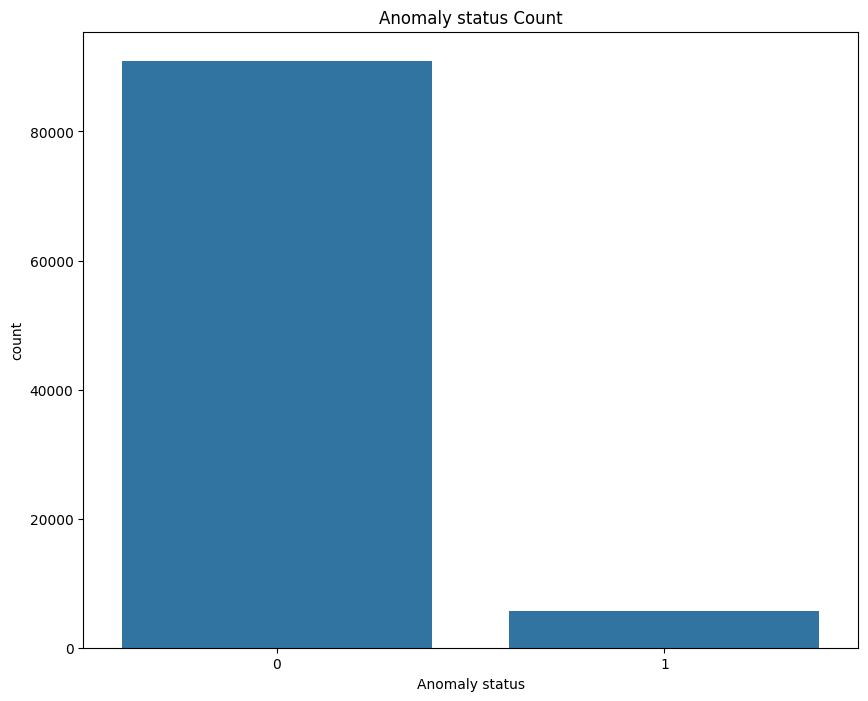

In [ ]:
# Diagrama de barras de la clase normal y la clase anomala
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='Anomaly status',data=df1)
plt.title("Anomaly status Count")
plt.show()

Observando la distribucuion de los datos de manera grafica se observa que los registros ingresados con comportamientos normales tienen una mucha mayor representacion que los datos anomalos dentro del dataset, por lo que es necesario implementar tecnicas de balanceo.

Para esta serie de experimentos se hara uso de la funcion SMOTE, de la libreria imblearn.over_sampling, que va generar datos sinteticos de la clase menos representada, con balancear el dataset

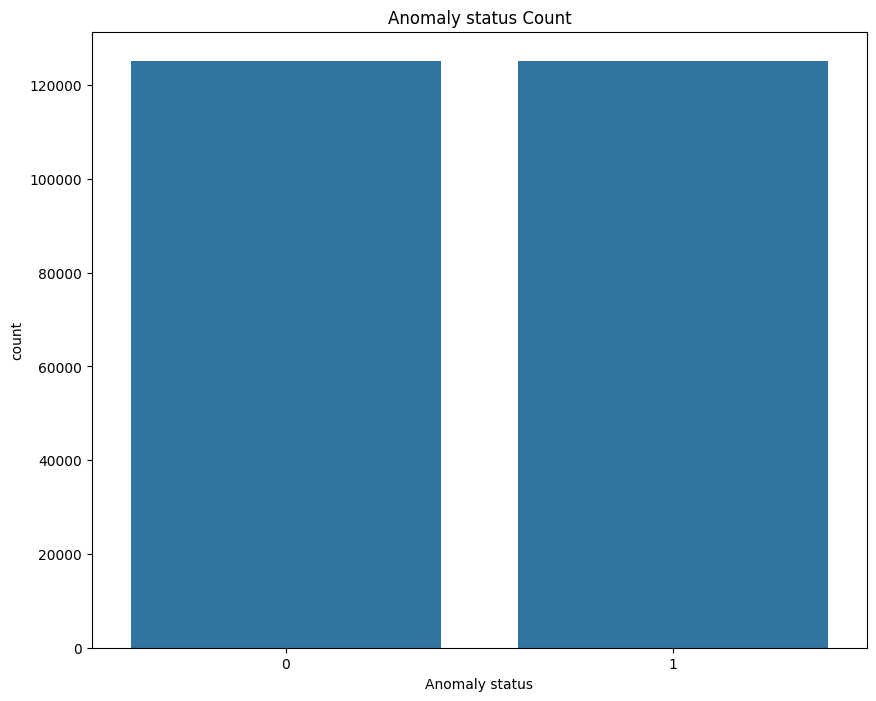

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Recreate the balanced dataframe
dfResampled = pd.DataFrame(X_resampled, columns=X.columns)
dfResampled['Anomaly status'] = y_resampled

# Visualize
ax = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x='Anomaly status', data=dfResampled)
plt.title("Anomaly status Count")
plt.show()

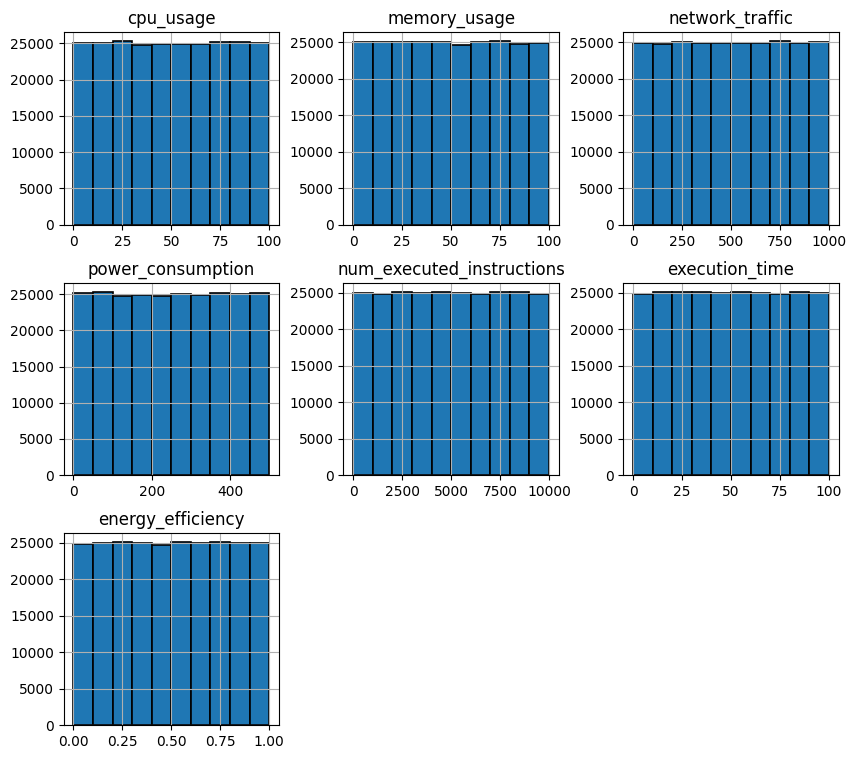

In [32]:
#Histogramas de las variables predictoras
anomalies_var = anomalies.drop(['Anomaly status'], axis=1)
anomalies_var.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(10, 9)
plt.show()

### Inspeccion de variables predictoras relacionadas

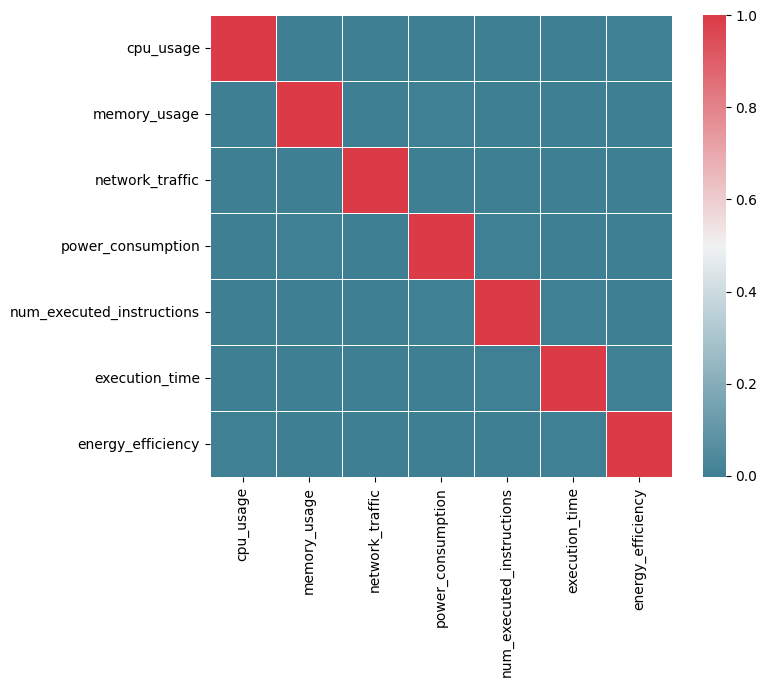

In [ ]:
X_train = anomalies.drop(['Anomaly status','task_type', 'task_priority', 'task_status','vm_id','timestamp'], axis=1) # Separa las variables predictoras de las variable a predecir
y_train = anomalies['Anomaly status']

#Mapa de calor de correlacion entre variables
f, ax = plt.subplots(figsize=(8, 6))
corr = X_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
          cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, linewidths=.5)
plt.show()

La matriz de correlacion de las variables predictoras seleccionadas revela que estas presentan un nulo nivel de correlacion entre ellas, por lo que todas pueden ser consideradas para el entrenamiento de los modelos de aprendizaje de maquinas a desarrollar

### Modelos de aprendizaje de maquina

En este bloque se va a desarrollar el entrenamiento de 4 modelos de clasificacion de apredizaje de maquina, cada uno con una tecnica distinta:

- Regresion logistica
- Arboles de decision
- Random forest
- Redes neuronales